In [58]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
url = 'https://en.wikipedia.org/wiki/List_of_current_WNBA_team_rosters'

In [60]:
url = 'https://en.wikipedia.org/wiki/List_of_current_WNBA_team_rosters'

response = requests.get(url)

soup = BeautifulSoup(response.text,'html.parser')

test = soup.findAll('td')

WNBA = []
for x in test:
    WNBA.append(str(x))

In [61]:
WNBA = []
for x in test:
    WNBA.append(str(x))

In [62]:
string = '<td style="text-align:right; white-space:nowrap;"><span data-sort-value'

In [63]:
heights = [s for s in WNBA if '<td style="text-align:right; white-space:nowrap;"><span data-sort-value' in s]

In [64]:
heights.pop(0)

'<td style="vertical-align:top;">\n<table class="sortable" style="background:transparent; margin:0px; width:100%;">\n<tbody><tr>\n<th>Pos.</th>\n<th>#</th>\n<th>Nat.</th>\n<th>Name</th>\n<th class="unsortable"></th>\n<th class="unsortable"></th>\n<th>Height</th>\n<th class="unsortable"></th>\n<th>Weight</th>\n<th class="unsortable"></th>\n<th class="unsortable"></th>\n<th><abbr title="Date of Birth">DOB</abbr></th>\n<th class="unsortable"></th>\n<th class="unsortable"></th>\n<th>From</th>\n<th>Yrs\n</th></tr>\n<tr>\n<td style="text-align:center;"><span data-sort-value="1.5\xa0!"><a class="mw-redirect" href="/wiki/Guard_(basketball)" title="Guard (basketball)">G</a></span>\n</td>\n<td style="text-align:center;">20\n</td>\n<td style="text-align:center;"><span data-sort-value="USA\xa0!"><span class="flagicon"><a href="/wiki/United_States" title="United States"><img alt="United States" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upl

In [65]:
final_heights = [] 
for x in range(len(heights)):
    y = re.findall(r'\d.\d+', heights[x])
    final_heights.append(y)

In [66]:
type(final_heights[26])

list

In [67]:
final_heights_numbers = []
for x in range(len(final_heights)):
    if type(final_heights[x]) == list:
        y = float(final_heights[x][0])
        final_heights_numbers.append(y)
    else:
        continue

In [68]:
final_heights_numbers[0:5]

[1.7, 1.93, 1.88, 1.78, 1.78]

In [69]:
df = pd.DataFrame(final_heights_numbers)

In [70]:
df = df.rename(index=str, columns = {0: 'Meters'})

In [71]:
df['Inches'] = df['Meters']*39.3701

In [72]:
df = df[df['Meters'] != 100]

In [73]:
df = df[df.Meters != 100]

In [74]:
df

,Meters,Inches
0,1.70,66.929170
1,1.93,75.984293
2,1.88,74.015788
3,1.78,70.078778
4,1.78,70.078778
5,1.96,77.165396
6,1.78,70.078778
7,1.70,66.929170
8,1.85,72.834685
9,1.70,66.929170


In [75]:
df = df.reset_index()

del df['index']

df.describe()

,Meters,Inches
count,152.000000,152.000000
mean,1.843553,72.580851
std,0.090900,3.578738
min,1.630000,64.173263
25%,1.780000,70.078778
50%,1.850000,72.834685
75%,1.910000,75.196891
max,2.060000,81.102406


In [76]:
df1 = pd.read_csv('all_seasons.csv')

In [77]:
Season_2016 = df1.loc[df1['season'] == '2016-17']

In [78]:
Season_2016_height = Season_2016['player_height']

In [79]:
NBA_Height = pd.DataFrame(Season_2016_height)

In [80]:
NBA_Height = NBA_Height.reset_index()

del NBA_Height['index']

NBA_Height.head()

NBA_Height['Inches'] = NBA_Height['player_height'] * 0.393701

In [81]:
NBA_Height = NBA_Height.rename(index=str, columns = {'player_height': 'Centimeters'})

In [82]:
NBA_Height.describe()

,Centimeters,Inches
count,486.000000,486.000000
mean,200.910864,79.098808
std,8.901969,3.504714
min,175.260000,69.000037
25%,195.580000,77.000042
50%,200.660000,79.000043
75%,208.280000,82.000044
max,220.980000,87.000047


In [83]:
df.describe()

,Meters,Inches
count,152.000000,152.000000
mean,1.843553,72.580851
std,0.090900,3.578738
min,1.630000,64.173263
25%,1.780000,70.078778
50%,1.850000,72.834685
75%,1.910000,75.196891
max,2.060000,81.102406


In [84]:
WNBA_jump = (1.33*df['Inches'].mean())+19

In [85]:
NBA_jump = (1.33*NBA_Height['Inches'].mean()) + 28.1

In [86]:
print(WNBA_jump)
print(NBA_jump)

115.53253244249998
133.30141483342507


In [87]:
WNBA_rim = (WNBA_jump*120)/NBA_jump

In [88]:
NBA_equivalent_rim = (NBA_jump*120)/WNBA_jump

In [89]:
print(WNBA_rim)
print(NBA_equivalent_rim)

104.00417662801618
138.45597808541268


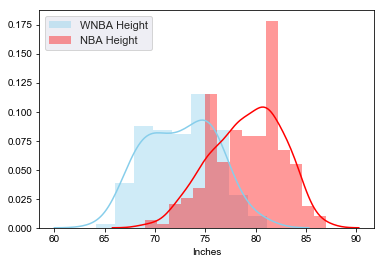

In [90]:
sns.distplot(df['Inches'], color="skyblue", label="WNBA Height")
sns.distplot(NBA_Height['Inches'], color="red", label="NBA Height")
sns.set(rc={'figure.figsize':(15,12)})
plt.legend()
plt.show()

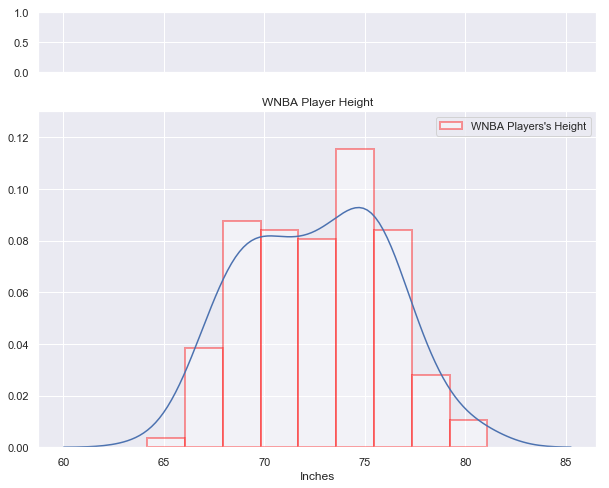

In [91]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(df.Inches, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "WNBA Players's Height",
                                  },
             ax=ax2)
ax2.set_title('WNBA Player Height')

ax2.set(ylim=(0, .08))
plt.ylim(0,0.13)
plt.legend();

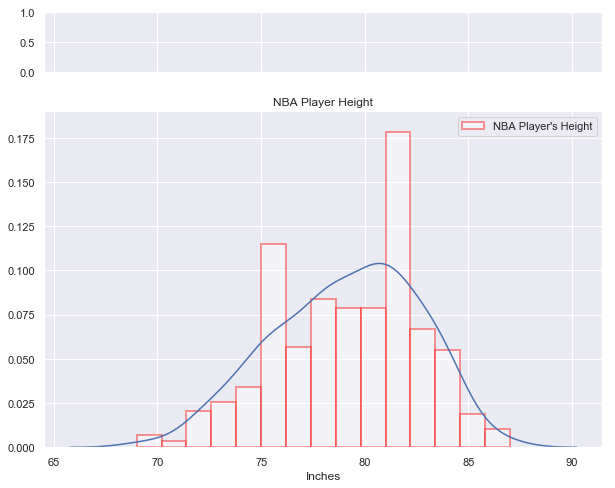

In [92]:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(NBA_Height.Inches, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "NBA Player's Height",
                                  },
             ax=ax2)
ax2.set_title('NBA Player Height')

ax2.set(ylim=(0, .08))
plt.ylim(0,0.19)
plt.legend();

In [93]:
url1 = 'https://www.basketball-reference.com/leagues/NBA_2019.html'

response1 = requests.get(url1)

soup1 = BeautifulSoup(response1.text,'html.parser')

In [94]:
Three_Pts = soup1.text

In [95]:
body = re.compile(r'data=sta"fg3a">d+<')

In [96]:
import numpy as np

In [97]:
X = np.array([3034, 2829, 2965, 2783, 2123, 2388, 3002, 2571, 2854, 2824, 3721, 2081, 2118, 2541, 2368, 2658, 3134, 2357, 2449, 2421, 2677, 2633, 2474, 2400, 2520, 2455, 2071, 2771, 2789, 2731], dtype=np.float64)



In [98]:
len(X)

30

In [99]:
Y = np.array([528, 337, 326, 264, 340, 248, 428, 348, 277, 504, 392, 224, 408, 572, 274, 437, 488, 319, 379, 315, 459, 353, 412, 434, 383, 437, 186, 294, 573, 454], dtype=np.float64)



In [100]:
len(Y)

30

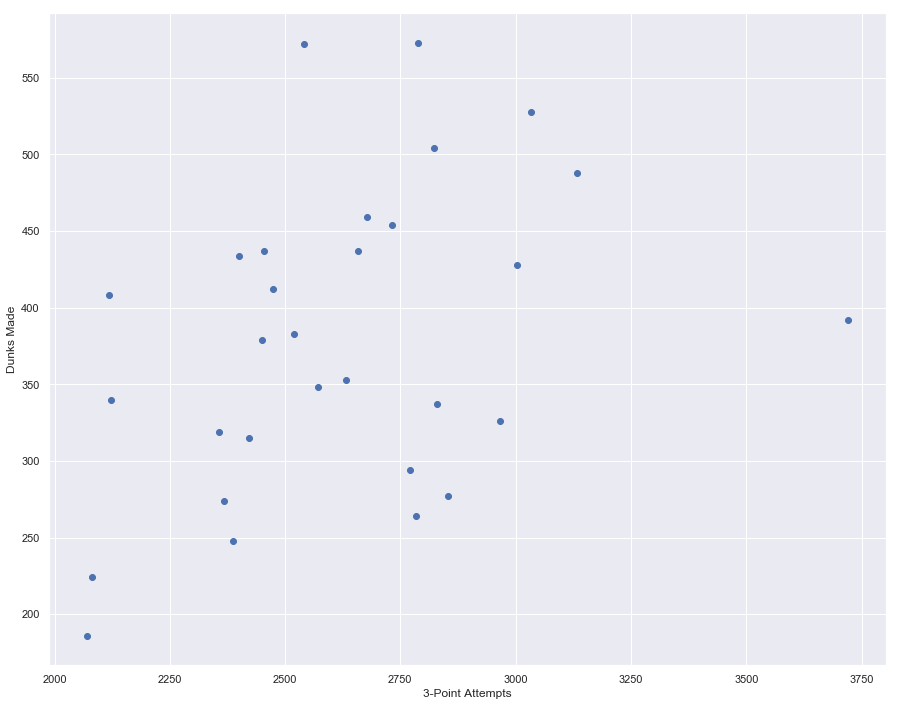

In [101]:
plt.scatter(X,Y)
plt.xlabel('3-Point Attempts')
plt.ylabel('Dunks Made')
plt.show()

In [102]:
def calc_slope(xs,ys):
    
    m = (np.mean(xs) * np.mean(ys) - np.mean(xs*ys)) / ((np.mean(xs)**2) - np.mean(xs*xs))
    
    return m

calc_slope(X,Y)

0.10535584481334682

In [103]:
def best_fit(xs,ys):
    
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c


m, c = best_fit(X,Y)
m, c

(0.10535584481334682, 103.2356689235815)

In [104]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

In [105]:
from matplotlib.pyplot import figure

In [106]:
figure(num=None, figsize=(2,1), dpi=80, facecolor='w', edgecolor='k')

<Figure size 160x80 with 0 Axes>

<Figure size 160x80 with 0 Axes>

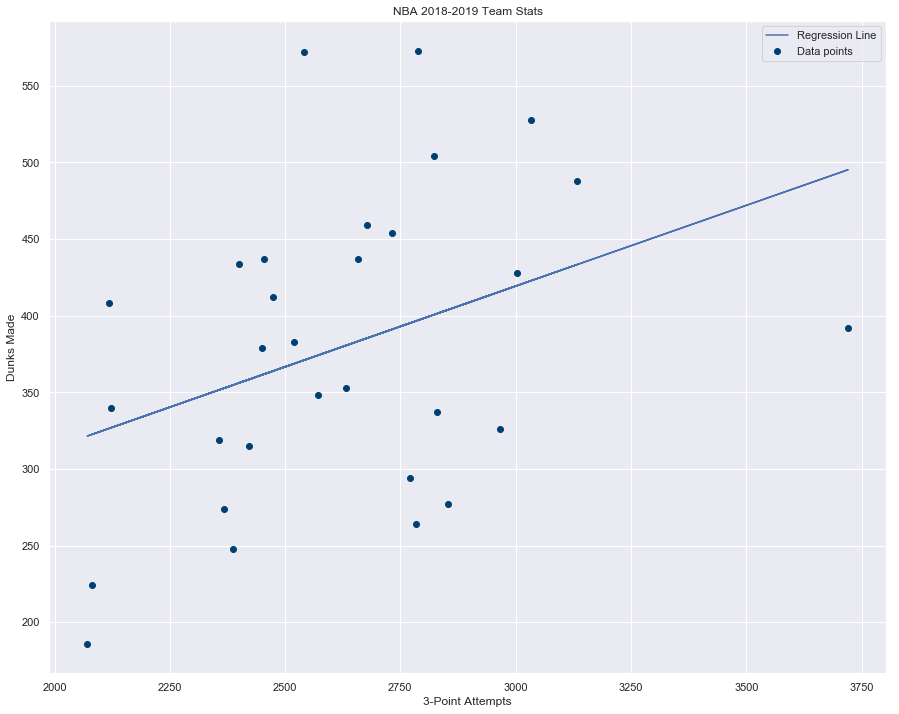

In [110]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()
plt.xlabel('3-Point Attempts')
plt.ylabel('Dunks Made')
plt.title('NBA 2018-2019 Team Stats')
plt.show()

In [111]:
np.corrcoef(X,Y)

array([[1.        , 0.37386304],
       [0.37386304, 1.        ]])

In [112]:
BG = pd.DataFrame(X)

In [113]:
BG[1] = Y

In [114]:
BG.corr()

,0,1
0,1.000000,0.373863
1,0.373863,1.000000


In [115]:
import scipy

scipy.stats.pearsonr(BG[0], BG[1])

(0.37386303991338127, 0.041831289025583536)

In [116]:
B = np.array([3034, 2829, 2965, 2783, 2123, 2388, 3002, 2571, 2854, 2824, 2081, 2118, 2541, 2368, 2658, 3134, 2357, 2449, 2421, 2677, 2633, 2474, 2400, 2520, 2455, 2071, 2771, 2789, 2731], dtype=np.float64)
G = np.array([528, 337, 326, 264, 340, 248, 428, 348, 277, 504, 224, 408, 572, 274, 437, 488, 319, 379, 315, 459, 353, 412, 434, 383, 437, 186, 294, 573, 454], dtype=np.float64)




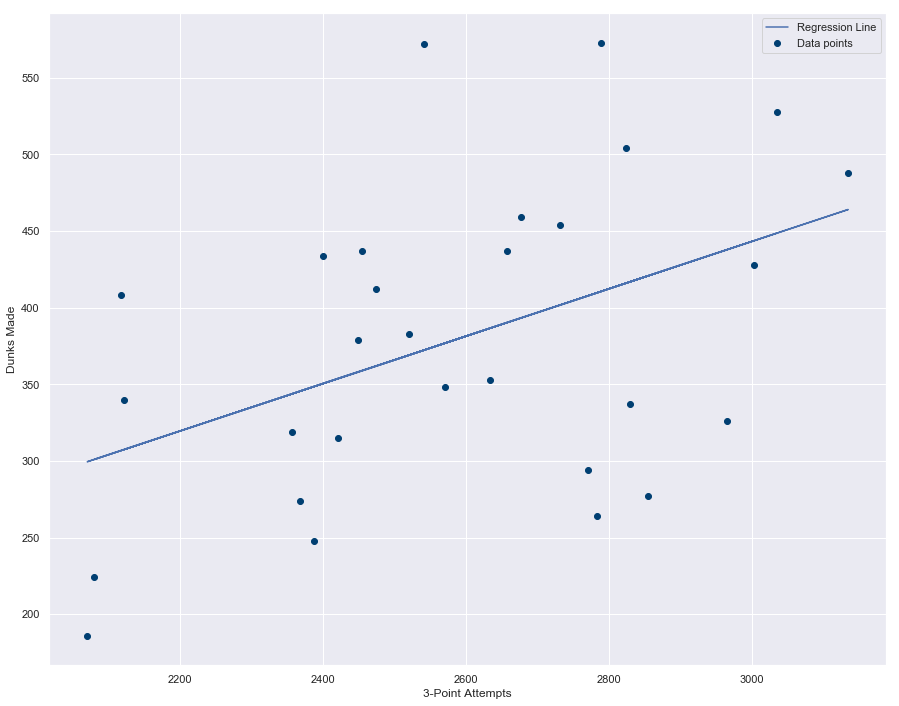

In [117]:
l, n = best_fit(B,G)
regression_line1 = reg_line(l,n,B)
plt.scatter(B,G,color='#003F72', label="Data points")
plt.plot(B, regression_line1, label= "Regression Line")
plt.legend()
plt.xlabel('3-Point Attempts')
plt.ylabel('Dunks Made')
plt.show()

In [118]:
np.corrcoef(B,G)

array([[1.        , 0.44503396],
       [0.44503396, 1.        ]])

In [119]:
No_Rockets = pd.DataFrame(B)

No_Rockets[1] = G

In [120]:
No_Rockets.corr()

,0,1
0,1.000000,0.445034
1,0.445034,1.000000


In [125]:
scipy.stats.pearsonr(No_Rockets[0], No_Rockets[1])

(0.4450339647253483, 0.015559103837091994)